#Loading HW4Q2 Question

In [1]:
import numpy as np
import gzip

#pfile = input('Please enter the path/file to read: ')
#infile = gzip.open(pfile, 'rt')#'CDBRFS08.ASC.gz'
infile = gzip.open('CDBRFS08.ASC.gz', 'rt')
age = []; cw = []; waya = []; ht = []; gender = [];
data = []
for line in infile:
    age += [line[100:102]]
    cw += [line[118:122]]
    ht += [line[122:126]]
    waya += [line[126:130]]        
    gender += [line[142]]

data = list(zip(age, cw, waya, ht, gender)) #put alltogether
npdata = np.array(data)         #create a Numpy array
""" One way to clean the data """
#delete missing or invalid data (rows) for cw, waya, and height
dRows,_ = np.where(np.logical_or(np.logical_or(npdata=='    ', npdata=='9999'), npdata=='7777'))
npdata = np.delete(npdata, dRows, axis=0)
#delete missing or invalid data for age
dRows,_ = np.where(np.logical_or(npdata=='09', npdata=='07'))
npdata = np.delete(npdata, dRows, axis=0)
#convert npdata into a float array
npdata = npdata.astype('float64')
#delete more invalid data for height
dRows = np.where(np.logical_and(npdata[:,3]>711, npdata[:,3]<9000))
npdata = np.delete(npdata, dRows, axis=0)

#convert current weight to kilogram except for 9000 - 9998 entries
npdata[npdata[:,1]<9000,1] /= 2.2
npdata[npdata[:,1]>=9000,1] -= 9000
#convert weight a year ago to kilogram, except for 9000-9998 entries
npdata[npdata[:,2]<9000,2] /= 2.2
npdata[npdata[:,2]>=9000, 2] -= 9000
#convert height to centimeters, except for 9000-9998
npdata[npdata[:,3]<9000, 3] = np.trunc(np.trunc(npdata[npdata[:,3]<9000, 3]/100) * 30.48 + npdata[npdata[:,3]<9000, 3] %100 * 2.54 +0.5)
npdata[npdata[:,3]>=9000, 3] -= 9000
npdata.round(1, npdata)     #round all entries to 1 decimal point






array([[ 39. ,  88.6,  88.6, 180. ,   1. ],
       [ 64. ,  75. ,  84.5, 155. ,   2. ],
       [ 51. , 100. , 100. , 183. ,   1. ],
       ...,
       [ 18. ,  68.2,  63.6, 178. ,   1. ],
       [ 42. ,  90.5,  90.9, 163. ,   1. ],
       [ 75. ,  59.1,  63.6, 165. ,   2. ]])

#Q1)

a) Pie chart for the number of males and females participating in the study. 

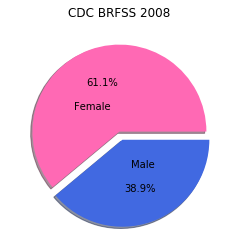

In [154]:
import matplotlib.pyplot as plt

#need number of males & females participating in study & their percentages
fmask = npdata[npdata[:,4]==2]
mmask= npdata[npdata[:,4] == 1]
x = [len(fmask), len(mmask)]
plt.pie(x, colors=['hotpink','royalblue'], labels = ['Female', 'Male'], labeldistance = 0.3, explode = [0,0.1], autopct='%1.1f%%', shadow=True)
plt.annotate
plt.title('CDC BRFSS 2008')
plt.show()

b) Histograms for age distribution.

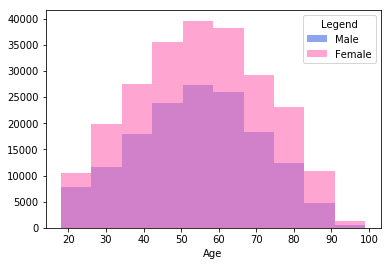

In [153]:
#histogram for age distribution
f_agemask = npdata[npdata[:,4]==2][:,0]
m_agemask = npdata[npdata[:,4] == 1][:,0]
x=[f_agemask, m_agemask ]
plt.hist(x, bins=10, histtype='stepfilled', color=['hotpink','royalblue'], alpha=0.6)
plt.legend(['Male', 'Female'],loc=1, title='Legend')
plt.xlabel('Age')
plt.show()



c) Box plots for CW and WAYA

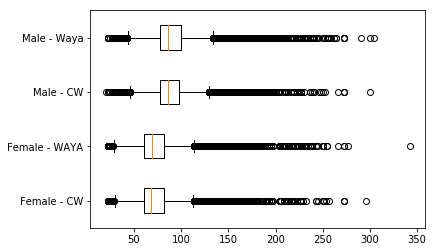

In [50]:
#boxplots for CW and WAYA
f_cwmask = npdata[npdata[:,4]==2][:,1]
f_wayamask = npdata[npdata[:,4]==2][:,2]
m_cwmask = npdata[npdata[:,4] == 1][:,1]
m_wayamask = npdata[npdata[:,4] == 1][:,2]
data = [f_cwmask, f_wayamask,m_cwmask,m_wayamask]
plt.boxplot(data, vert=False)
plt.yticks([1,2,3,4], ['Female - CW', 'Female - WAYA','Male - CW','Male - Waya' ])
plt.show()

d) Bar chart to show the percentage of people who gained, lost, or had unchanged
weight from last year to current year.


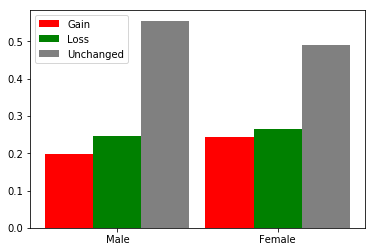

In [91]:
#bar chart to show % of people who gained, lost, or had unchanged weight from last->current year
mtotal = npdata[npdata[:,4]==1].shape[0]
ftotal = npdata[npdata[:,4]==2].shape[0]

gained = npdata[np.where(npdata[:,1] > npdata[:,2])]
lost = npdata[np.where(npdata[:,1] < npdata[:,2])]
unchanged = npdata[np.where(npdata[:,1] == npdata[:,2])]

gained_mf = [len(gained[gained[:,4]==1])/mtotal, len(gained[gained[:,4]==2])/ftotal]
lost_mf = [len(lost[lost[:,4]==1])/mtotal, len(lost[lost[:,4]==2])/ftotal ]
unchanged_mf = [len(unchanged[unchanged[:,4]==1])/mtotal, len(unchanged[unchanged[:,4]==2])/ftotal ]

xcoord = np.array([1,2])
barwidth = 0.3
plt.bar(xcoord, gained_mf, color='r', label='Gain', width=barwidth)
plt.bar(xcoord+barwidth, lost_mf, color='g', label='Loss', width=barwidth)
plt.bar(xcoord+2*barwidth, unchanged_mf, color='gray', label='Unchanged', width=barwidth)
plt.xticks(xcoord+barwidth, ['Male', 'Female'])
plt.legend(['Gain','Loss','Unchanged'], loc=2)
plt.show()

e)  A grid that consists of height and current weight distributions and the scatter chart. 

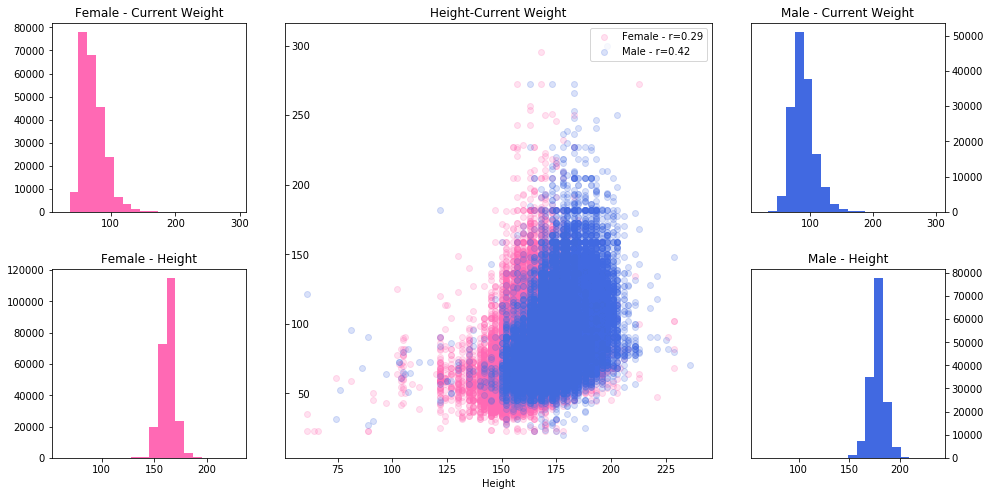

In [148]:
#grid



fcw = npdata[npdata[:,4]==2][:,1]
fht = npdata[npdata[:,4]==2][:,3]
mcw = npdata[npdata[:,4]==1][:,1]
mht = npdata[npdata[:,4]==1][:,3]

gs = plt.GridSpec(2,4, hspace=0.3)
fig = plt.figure(figsize=(16,8))
f_cw = plt.subplot(gs[0,0])
f_height = plt.subplot(gs[1,0])
mid = plt.subplot(gs[:,1:3])
m_cw = plt.subplot(gs[0,3])
m_height = plt.subplot(gs[1,3])

#topleft - female current weight distribution
f_cw.hist(fcw, bins=20, histtype='stepfilled', color='hotpink')
f_cw.set_title('Female - Current Weight')
#botleft - female height distribution
f_height.hist(fht, bins=20, histtype='stepfilled',color='hotpink')
f_height.set_title('Female - Height')

#middle - height/current weight scatter
x=[fht, mht]
y=[fcw, mcw]
colors = ['m','b']
mid.scatter(fht, fcw,color='hotpink', alpha=0.2)
mid.scatter(mht, mcw,color='royalblue', alpha=0.2)
mid.set_title('Height-Current Weight')
mid.set_xlabel('Height')
fr = np.corrcoef(fcw, fht)[0][1].round(2)
mr = np.corrcoef(mcw, mht)[0][1].round(2)
mid.legend(['Female - r='+str(fr), 'Male - r='+str(mr)], loc=1)

mid.tick_params(axis='y', direction='in', pad=-25)

#topright - male current weight distribution
m_cw.hist(mcw, bins=20, histtype='stepfilled',color='royalblue')
m_cw.set_title('Male - Current Weight')
m_cw.yaxis.tick_right()
#botright - male height distribution
m_height.hist(mht, bins=20, histtype='stepfilled',color='royalblue')
m_height.set_title('Male - Height')
m_height.yaxis.tick_right()

